<a href="https://colab.research.google.com/github/hdtran103/Prediction-of-Product-Sales/blob/main/Model_Statistical_Analyses_Peter_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Model Statistical Analyses**

> Sales Prediction



Sales Prediction
- Distribution

- Statistical

- Correlation **bold text**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import these library would create a visualization.**

In [39]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## Seaborn
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load Data
filename = "/content/drive/MyDrive/03 Week 3: Exploratory Viz/sales_predictions.csv"
sp = pd.read_csv(filename)

In [41]:
# Display first few of dataset:
sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
# Display infomation about the dataset:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


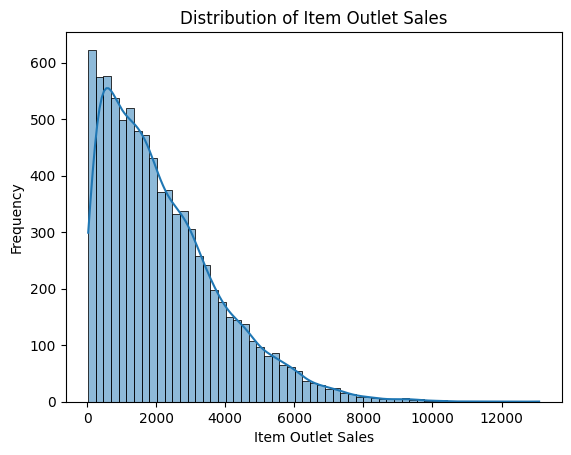

In [43]:
# Create a histogram to view the distributions of various features
sns.histplot(data=sp, x='Item_Outlet_Sales', kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()


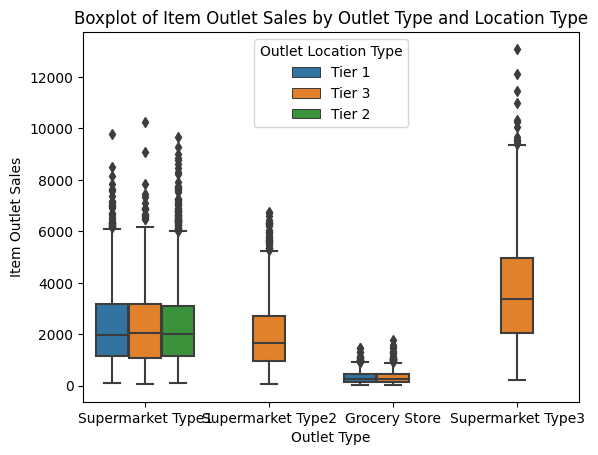

In [37]:
# Create a boxplot to view statistical summaries of various features
sns.boxplot(data=sp, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type')
plt.title('Boxplot of Item Outlet Sales by Outlet Type and Location Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.legend(title='Outlet Location Type')
plt.show()

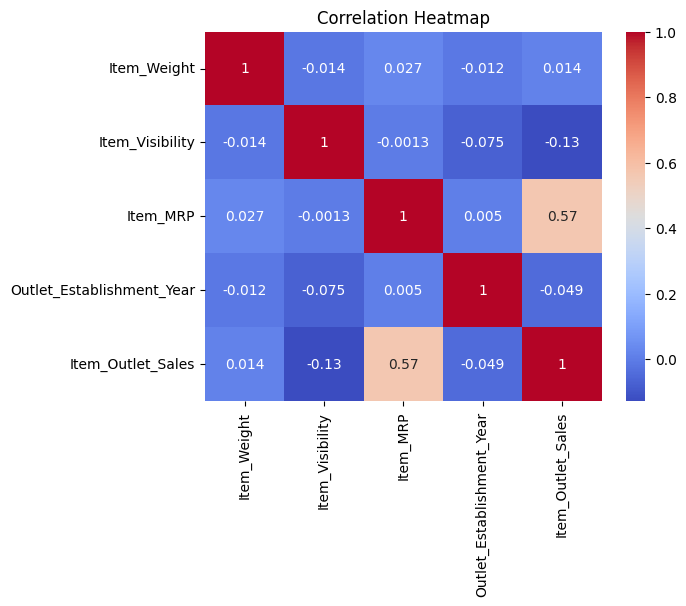

In [21]:
# Create a heatmap of the correlation between features
correlation = sp.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Scatter Plot**


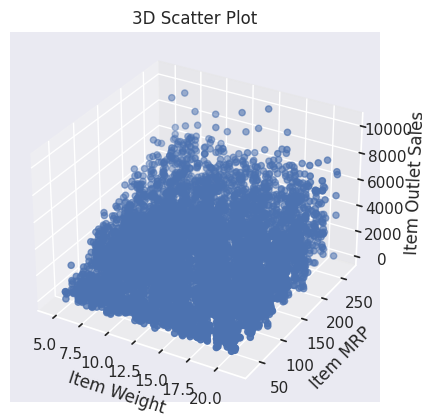

In [50]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(sp['Item_Weight'], sp['Item_MRP'], sp['Item_Outlet_Sales'])

# Set labels and title
ax.set_xlabel('Item Weight')
ax.set_ylabel('Item MRP')
ax.set_zlabel('Item Outlet Sales')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


Area Plot

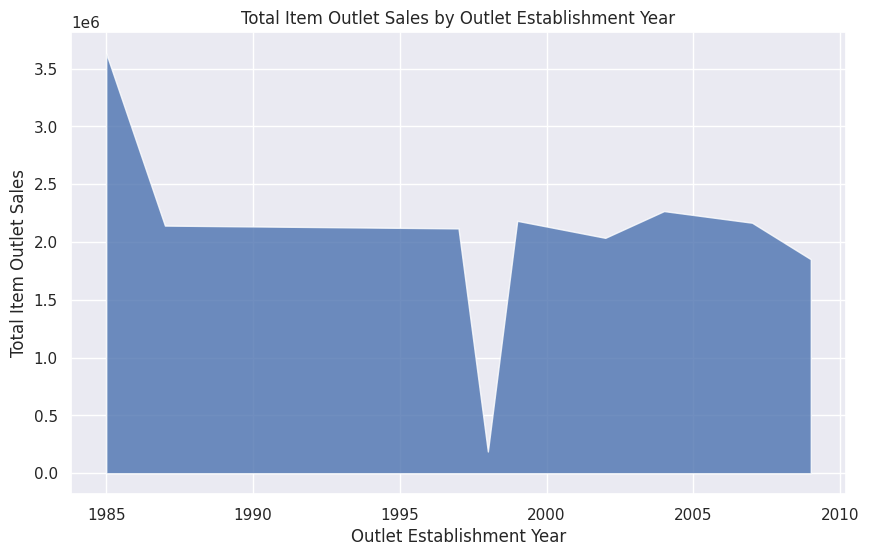

In [52]:
# Group by Outlet_Establishment_Year and calculate the sum of Item_Outlet_Sales
sales_by_year = sp.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

# Create an area plot using fill_between()
plt.figure(figsize=(10, 6))
plt.fill_between(x='Outlet_Establishment_Year', y1='Item_Outlet_Sales', data=sales_by_year, alpha=0.8)

# Set labels and title
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Item Outlet Sales')
plt.title('Total Item Outlet Sales by Outlet Establishment Year')

# Show the plot
plt.show()
